<a href="https://colab.research.google.com/github/Sreejith-CG/Comment-Toxicity-Detection/blob/main/Toxicity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Libraries**

In [1]:
import os
import pandas as pd
import tensorflow as tf
import numpy as np

In [2]:
df = pd.read_csv('/content/drive/MyDrive/toxic comments data/train.csv')

In [3]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [4]:
df.tail()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0
159570,fff46fc426af1f9a,"""\nAnd ... I really don't think you understand...",0,0,0,0,0,0


In [5]:
df[df['toxic']==1].tail()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
159494,fef4cf7ba0012866,"""\n\n our previous conversation \n\nyou fuckin...",1,0,1,0,1,1
159514,ff39a2895fc3b40e,YOU ARE A MISCHIEVIOUS PUBIC HAIR,1,0,0,0,1,0
159541,ffa33d3122b599d6,Your absurd edits \n\nYour absurd edits on gre...,1,0,1,0,1,0
159546,ffb47123b2d82762,"""\n\nHey listen don't you ever!!!! Delete my e...",1,0,0,0,1,0
159554,ffbdbb0483ed0841,and i'm going to keep posting the stuff u dele...,1,0,1,0,1,0


In [6]:
df.iloc[159554]['comment_text']

"and i'm going to keep posting the stuff u deleted until this fucking site closes down have fun u stupid ass bitch don't ever delete anything fuckin hore like i said before go to hell"

In [7]:
df[df.columns[2:]].iloc[159554]

toxic            1
severe_toxic     0
obscene          1
threat           0
insult           1
identity_hate    0
Name: 159554, dtype: int64

# **Preprocess comments**

In [8]:
from tensorflow.keras.layers import TextVectorization

In [9]:
x = df['comment_text']
y= df[df.columns[2:]].values

In [10]:
MAX_FEATURES = 200000 #number of words in the vocab

In [11]:
vectorizer = TextVectorization(max_tokens=MAX_FEATURES,output_sequence_length=1800,output_mode='int')

In [12]:
vectorizer.adapt(x.values)

In [13]:
vectorizer('Hello world, life is great')[:5]

<tf.Tensor: shape=(5,), dtype=int64, numpy=array([288, 263, 306,   9, 275])>

In [14]:
vectorized_text = vectorizer(x.values)

In [15]:
vectorized_text

<tf.Tensor: shape=(159571, 1800), dtype=int64, numpy=
array([[  645,    76,     2, ...,     0,     0,     0],
       [    1,    54,  2489, ...,     0,     0,     0],
       [  425,   441,    70, ...,     0,     0,     0],
       ...,
       [32445,  7392,   383, ...,     0,     0,     0],
       [    5,    12,   534, ...,     0,     0,     0],
       [    5,     8,   130, ...,     0,     0,     0]])>

In [16]:
#mcshbap = mape,cache,shuffle,batch,prefetch from_tensor_slices, list_file
dataset = tf.data.Dataset.from_tensor_slices((vectorized_text,y))
dataset = dataset.cache()
dataset = dataset.shuffle(1600000)
dataset = dataset.batch(16)
dataset = dataset.prefetch(8) #helps prevents bottlenecks

In [17]:
batch_x,batch_y=dataset.as_numpy_iterator().next()

In [18]:
batch_x.shape

(16, 1800)

In [19]:
batch_y.shape

(16, 6)

In [20]:
train = dataset.take(int(len(dataset)*.7))
val = dataset.skip(int(len(dataset)*.7)).take(int(len(dataset)*.2))
test = dataset.skip(int(len(dataset)*.9)).take(int(len(dataset)*.1))

In [21]:
train_generator =train.as_numpy_iterator()

In [22]:
train_generator.next()

(array([[     8,     47,     52, ...,      0,      0,      0],
        [   265,     13,     29, ...,      0,      0,      0],
        [    33,     15,   8185, ...,      0,      0,      0],
        ...,
        [    94,     13,  57403, ...,      0,      0,      0],
        [117496,   4325,    118, ...,      0,      0,      0],
        [    49,      8,     25, ...,      0,      0,      0]]),
 array([[0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 0, 1, 0, 1, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 0, 1, 0, 1, 0],
        [0, 0, 0, 0, 0, 0]]))

# **Create sequential model**

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dropout,Bidirectional,Dense,Embedding

In [24]:
model = Sequential()
#create the embedding layer
model.add(Embedding(MAX_FEATURES+1,32))
#Bidirectional LSTM Layer
model.add(Bidirectional(LSTM(32,activation='tanh')))
#Feature extractor Fully connected layers
model.add(Dense(128,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
#Final layer
model.add(Dense(6,activation='sigmoid'))

In [25]:
model.compile(loss='BinaryCrossentropy',optimizer='Adam')

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          6400032   
                                                                 
 bidirectional (Bidirectiona  (None, 64)               16640     
 l)                                                              
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 6)                 774       
                                                        

In [27]:
history = model.fit(train,epochs=1,validation_data=val)

6981/6981 [==============================] - 841s 119ms/step - loss: 0.0622 - val_loss: 0.0453


In [28]:
history.history

{'loss': [0.062227826565504074], 'val_loss': [0.0453200601041317]}

In [29]:
from matplotlib import pyplot as plt

<Figure size 800x500 with 0 Axes>

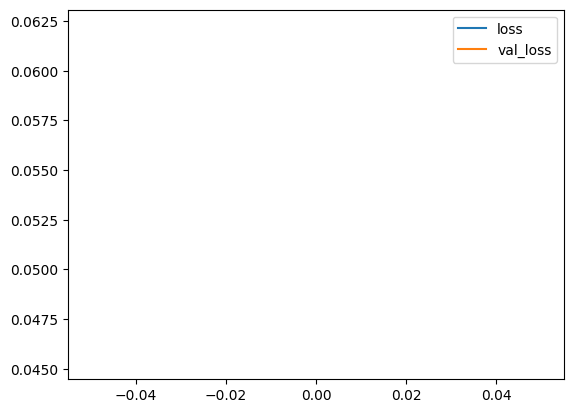

In [30]:
plt.figure(figsize=(8,5))
pd.DataFrame(history.history).plot()
plt.show()

# **Make predictions**

In [33]:
input_text = vectorizer('You freaking suck! I am going to hit you.')

In [34]:
input_text = np.expand_dims(input_text, axis=0)

In [35]:
res = model.predict(input_text)

1/1 [==============================] - 1s 695ms/step


In [36]:
(res > 0.5).astype(int)

array([[1, 0, 1, 0, 1, 0]])

In [37]:
batch_X, batch_y = test.as_numpy_iterator().next()

In [38]:
(model.predict(batch_X) > 0.5).astype(int)

1/1 [==============================] - 0s 64ms/step


array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [39]:
res.shape

(1, 6)

# **Evaluvating models**

In [40]:
from tensorflow.keras.metrics import Precision,Recall,CategoricalAccuracy

In [41]:
pre = Precision()
re = Recall()
acc = CategoricalAccuracy()

In [42]:
for batch in test.as_numpy_iterator():
  # Unpack the batch
  x_true,y_true = batch
  # Make a prediction
  yhat = model.predict(x_true)

  # Flatten the predictions
  y_true = y_true.flatten()
  yhat = yhat.flatten()

  pre.update_state(y_true,yhat)
  re.update_state(y_true,yhat)
  acc.update_state(y_true,yhat)

1/1 [==============================] - 0s 75ms/step


In [43]:
print(f'Precision: {pre.result().numpy()},Recall: {re.result().numpy()},Accuracy: {acc.result().numpy()}')

Precision: 0.7897565364837646,Recall: 0.7120866775512695,Accuracy: 0.4924774467945099


# **Test and Gradio**

In [44]:
!pip install gradio jinja2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.8/19.8 MB 69.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.7/65.7 kB 6.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.8/288.8 kB 38.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 30.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.7/138.7 kB 19.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 20.2 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of mdit-py-plugins to determine which version is compatible with other requirements. This could take a while.
 

In [45]:
import tensorflow as tf
import gradio as gr

In [46]:
model.save('toxicity.h5')

In [47]:
model = tf.keras.models.load_model('toxicity.h5')

In [48]:
input_str = vectorizer('hey i freaken hate you!')

In [49]:
res = model.predict(np.expand_dims(input_str,0))

1/1 [==============================] - 1s 723ms/step


In [50]:
res

array([[0.7419538 , 0.03140078, 0.34950086, 0.04369739, 0.36714336,
        0.09201749]], dtype=float32)

In [51]:
def score_comment(comment):
    vectorized_comment = vectorizer([comment])
    results = model.predict(vectorized_comment)

    text = ''
    for idx, col in enumerate(df.columns[2:]):
        text += '{}: {}\n'.format(col, results[0][idx]>0.5)

    return text

In [52]:
interface = gr.Interface(fn=score_comment,
                         inputs=gr.inputs.Textbox(lines=2, placeholder='Comment to score'),
                        outputs='text')

<ipython-input-52-af0826c81d09>:2: GradioDeprecationWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  inputs=gr.inputs.Textbox(lines=2, placeholder='Comment to score'),
<ipython-input-52-af0826c81d09>:2: GradioDeprecationWarning: `optional` parameter is deprecated, and it has no effect
  inputs=gr.inputs.Textbox(lines=2, placeholder='Comment to score'),
<ipython-input-52-af0826c81d09>:2: GradioDeprecationWarning: `numeric` parameter is deprecated, and it has no effect
  inputs=gr.inputs.Textbox(lines=2, placeholder='Comment to score'),


In [53]:
interface.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://dcc3ef9c359e2692a6.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
